# Exercise Session 06

This is a very simple real-world example of linear regression from the area of civil engineering / material sciences. 
It is based on Exercise 2.22 in Chp 12 of
    
    Devore, Jay L., Kenneth N. Berk, and Matthew A. Carlton. Modern mathematical statistics with applications. New York: Springer, 2012.

using data from

    Li, L-J., et al. "Experimental study of recycled rubber-filled high-strength concrete." Magazine of concrete research 61.7 (2009): 549-556.
    


In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

For the past decade rubber powder has been used in asphalt cement to improve performance. Li et al 2009 experimentally test  rubber-filled high-strength concrete (RHSC) for different rubber content. One part of their analysis involves a regression with cube strength as input and axial strength as output (both in units of MPa) using the following small data set.

In [2]:
xs = np.array([112.3, 97.0, 92.7, 86.0, 102.0, 99.2, 95.8, 103.5, 89.0, 86.7])
ys = np.array([75.0, 71.0, 57.7, 48.7, 74.3, 73.3, 68.0, 59.3, 57.8, 48.5])

A scatter plot indicates that an (affine) linear relationship might be reasonable.

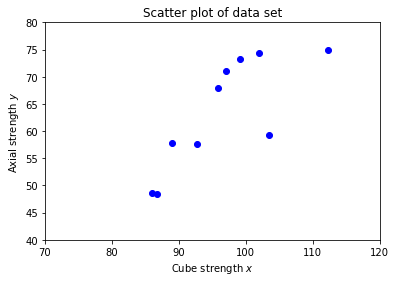

In [3]:
fig = plt.figure()
plt.plot(xs, ys, 'bo')
x_low = 70
x_high = 120
y_low = 40
y_high = 80
plt.xlim([x_low, x_high])
plt.ylim([y_low, y_high])
plt.xlabel('Cube strength $x$')
plt.ylabel('Axial strength $y$')
_ = plt.title('Scatter plot of data set')

We run a simple linear regression with bias (also called _intercept_ in the statistics literature). This corresponds in the notation of the Lecture to a linear regression with basis functions $\phi_0\equiv 1$, $\phi_1(x)=x$.

Here we manually implement the regression. __This is in general not advisable due to numerical issues and is done here for demonstration purposes__.

In [4]:
Phi = np.hstack([
    np.ones([xs.shape[0],1]), xs[:, np.newaxis]
])

w = la.solve(Phi.T @ Phi, Phi.T @ ys)


Let's plot the resulting prediction function. Once again, we implement it manually for demonstration purposes.


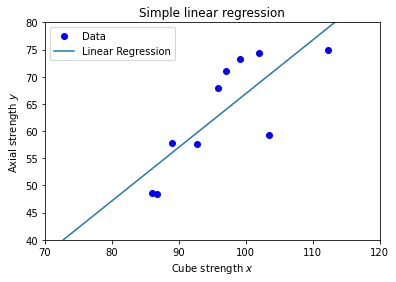

In [5]:
n_plot = 100
xs_plot = np.linspace(x_low, x_high, n_plot)
Phi_plot = np.hstack([
    np.ones([n_plot, 1]), xs_plot.reshape([-1,1])
])
plt.plot(xs, ys, 'bo')
plt.xlim([x_low, x_high])
plt.ylim([y_low, y_high])
plt.plot(xs_plot, Phi_plot @ w.reshape([-1,1]))

plt.xlabel('Cube strength $x$')
plt.ylabel('Axial strength $y$')
plt.legend(['Data', 'Linear Regression'])
_ = plt.title('Simple linear regression')


The outcome of linear regression can now be used to make predictions about the axial strength for cube strengths that haven't been investigated or to get insight into the physics of the materials used.

However, __in general it is important to perform a more careful statistical analysis in such a situation__,
which is beyond CSME.

If you are interested in these topics, Chapter 12 in Devore, Berk contains an elementary and practical introduction to applied regression from a statistics perspective.

To demonstrate that even in such simple situations one has to be careful with simple linear regression, let's have a closer look at the data set again. Inspection shows that the data point for $x=112.3$ is considerably larger than the rest.
What happens if this data point is removed? (E.g. it might be an outlier)

In [6]:
xs2 = np.array([97.0, 92.7, 86.0, 102.0, 99.2, 95.8, 103.5, 89.0, 86.7])
ys2 = np.array([71.0, 57.7, 48.7, 74.3, 73.3, 68.0, 59.3, 57.8, 48.5])
Phi2 = np.hstack([
    np.ones([xs2.shape[0],1]), xs2[:, np.newaxis]
])

w2 = la.solve(Phi2.T @ Phi2, Phi2.T @ ys2)


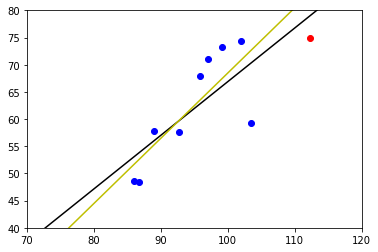

In [7]:
n_plot = 100
xs_plot = np.linspace(x_low, x_high, n_plot)
Phi_plot = np.hstack([
    np.ones([n_plot, 1]), xs_plot.reshape([-1,1])
])
plt.plot(xs2, ys2, 'bo')

plt.xlim([x_low, x_high])
plt.ylim([y_low, y_high])
plt.plot(xs_plot, Phi_plot @ w.reshape([-1,1]), 'k')
plt.plot(xs_plot, Phi_plot @ w2.reshape([-1,1]), 'y')
plt.plot(xs[0], ys[0], 'ro')
